The aim of this jupyter is to gain experience in the model dynamics and find reasonable values for the initial parameters 

# Initial mu and sigma 

Test values: 
* The test values for mu are {0.25, 0.5, 0.75} and for sigma are {0.1, 0.25, 0.5}

Other values assumption:
* The teacher expressivity is set to 0.5 to give some upward and downward freedom in case of policy application
* The teacher emotion is set to 0.75 because we assume that teacher interaction should be beneficial or at least neutral (average initial emotion of class is <= 0.75)

The right initial values for the baseline scenario has to satisfy the following conditions: 
* It is expected that every policy enances the attendace rate of the class respect to the baseline scenario. Therefore, the values should have some upward freedom to not saturate the model (big number of agents with emotion = 1)

* The students behavior should be realistic (someone has to complete the class, recover rate not so high, decrease attendance during the year, etc.)

* Something else? 



###  baseline online scenario

* adjMartrix made of zeros
* Turn off updating strategy of adjMatrix to keep the model as simple as possible
* "Dividing into groups policy" off 
* Keep the number of interactions 2 $\times$ num_agents

In [16]:
%reload_ext autoreload
%autoreload 2

#Phase Diagram
import random
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from ABM_model import AttendanceModel

#Adj Matrix Visualization
import pathpy as pp
from IPython.display import *
from mesa import Model
from mesa import Agent
import matplotlib.pyplot as plt
from visualization import AdjacencyGauss, neighbor, plot_adj_matrix, get_adj_matrix, initial_emotion_hist, plot_attendance, plot_agents, plot_attendance_step

In [2]:
# ==============================basic parameters=========================
'''
(max_steps % lecture_duration) should be equal to 0
teacher node only works as a sender
'''
num_agents = 50
# the adjacencyMatrix should be symmetric, the friendships are mutual, it doesn't matter what the diagonal values are because we won't use the diagonal values
seed = 32
random.seed(seed)

adjacencyMatrix = np.zeros((num_agents, num_agents))
adjacencyMatrix = (adjacencyMatrix + adjacencyMatrix.T) / 2
max_steps = 500
lecture_duration = 50
# according to the 'closure property' in the paper, delta_t should be less than 1/(|G|-1)
dt = 0.02
initial_emotion_mu = 0.5
initial_emotion_sigma = 0.1


# ========================updating adjacency matrix=======================
updateAdj = False
friendship_increase = 0.0
my_lambda = 0.9



# =======================parameters for teacher==========================
# if we set the expressiveness of teacher to 0, it has no effects on the network - we don't consider teacher node
expressiveness_teacher = 1
initial_emotion_teacher = 0.75
# this sigma is used to generate the sigma of the alphas from the teacher node to student nodes
teacher_send_alpha_sigma = 1
# lowerbound for the alpha between the teacher node and the students node
alpha_t_lowerbound = 0.1



# ===================parameters for "breakout room" policy=============
# parameters for the "breakout room" policy, if divided_into_groups=False, the group_num is forced to be 1 
divided_into_groups = False
group_num = 5




In [3]:
def visualize(model, num_agents):
    plot_attendance(model)
    plot_agents(model)
    plot_attendance_step(model)
    
mus = [0.25, 0.50, 0.75]
sigmas = [0.1, 0.2, 0.5]

Mu:  0.25 Sigma:  0.1


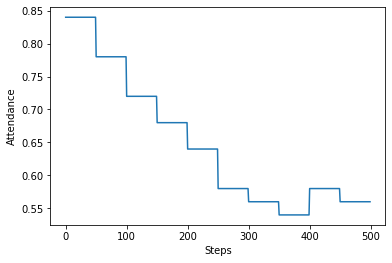

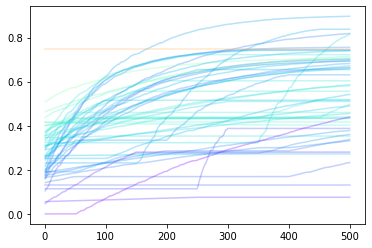

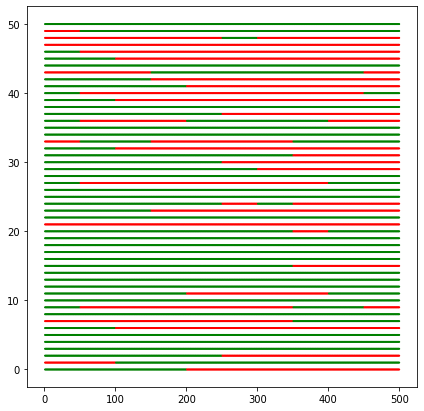

Mu:  0.5 Sigma:  0.1


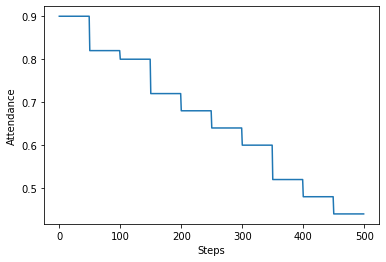

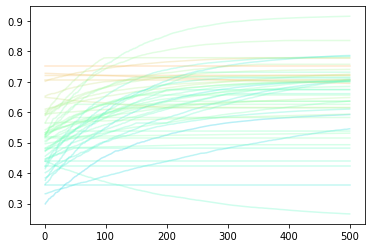

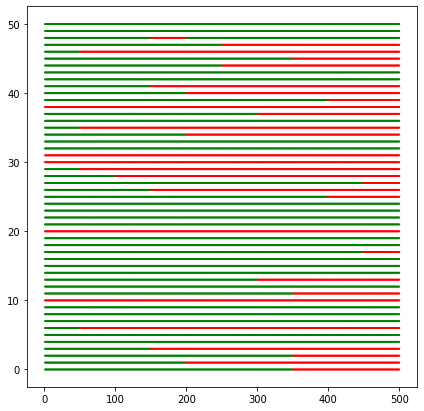

Mu:  0.75 Sigma:  0.1


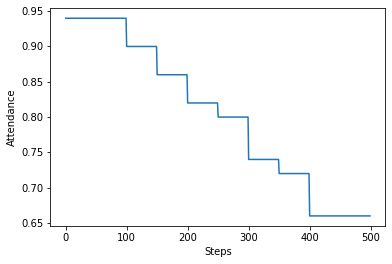

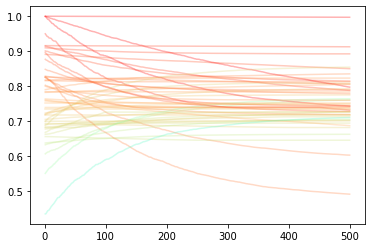

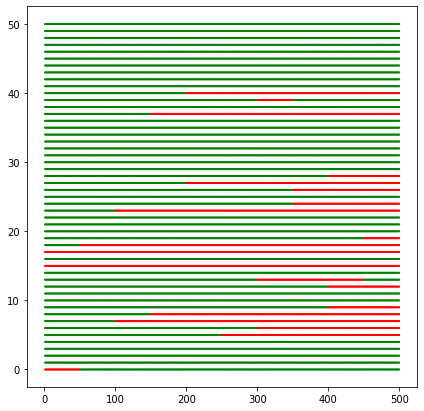

Mu:  0.25 Sigma:  0.2


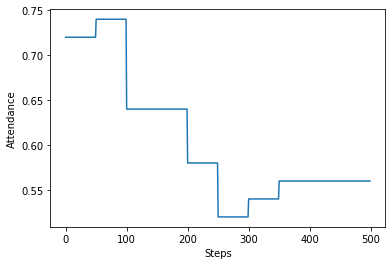

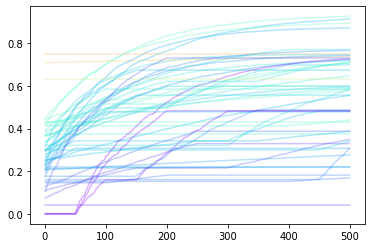

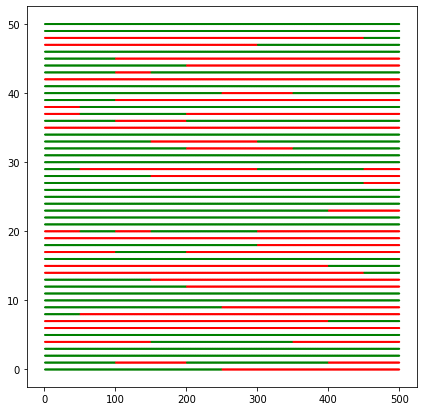

Mu:  0.5 Sigma:  0.2


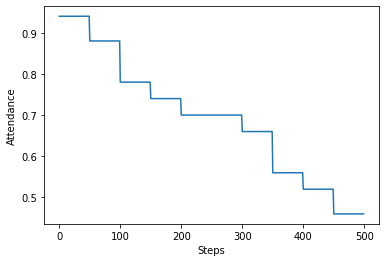

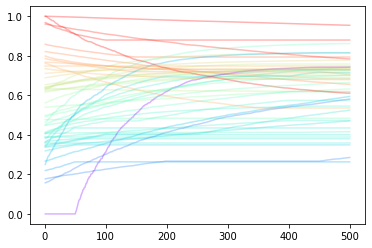

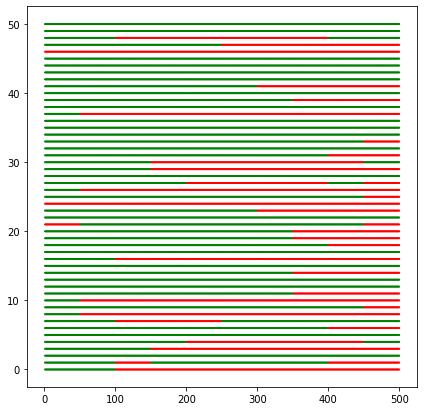

Mu:  0.75 Sigma:  0.2


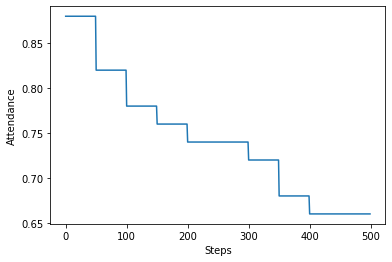

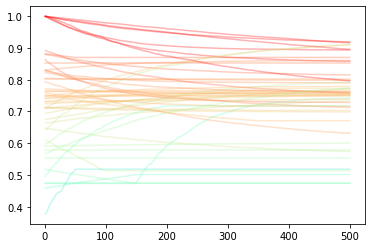

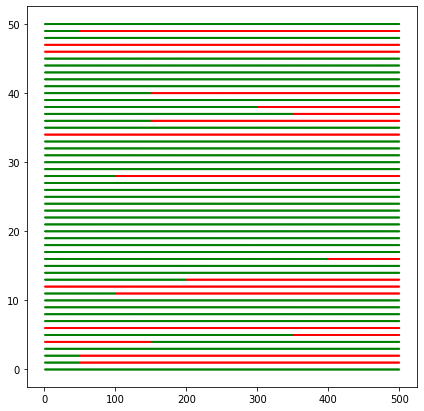

Mu:  0.25 Sigma:  0.5


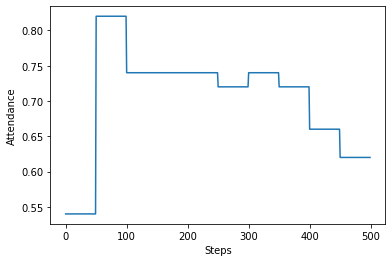

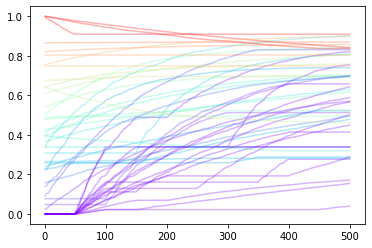

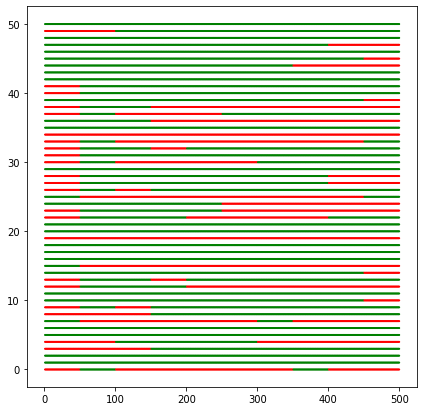

Mu:  0.5 Sigma:  0.5


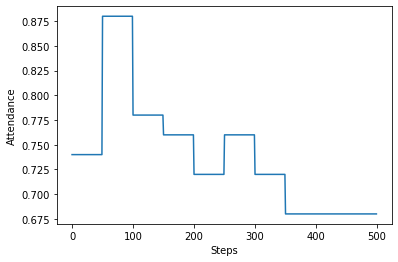

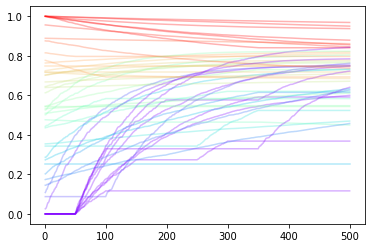

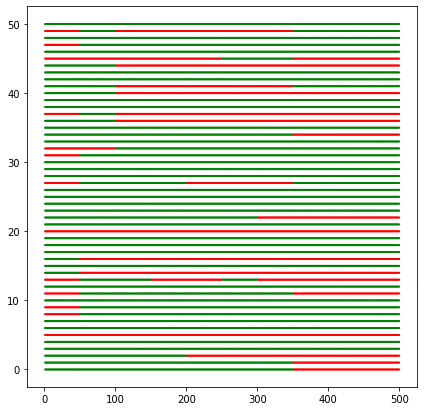

Mu:  0.75 Sigma:  0.5


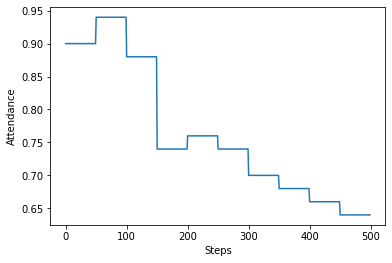

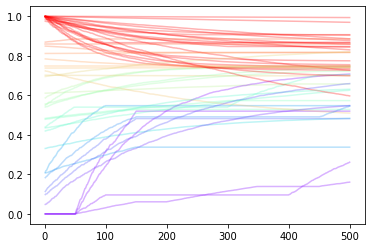

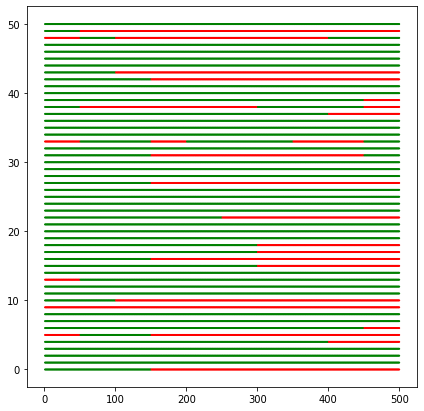

In [5]:
for j, sigma in enumerate(sigmas):
    for i, mu in enumerate(mus):  
        initial_emotion_mu = mu
        initial_emotion_sigma = sigma
        model = AttendanceModel(num_agents=num_agents, adjacencyMatrix=adjacencyMatrix, seed=seed, expressiveness_teacher=expressiveness_teacher, initial_emotion_teacher=initial_emotion_teacher, updateAdj=updateAdj, my_lambda=my_lambda, teacher_send_alpha_sigma=teacher_send_alpha_sigma,friendship_increase=friendship_increase, initial_emotion_mu=initial_emotion_mu, divided_group=divided_into_groups, group_num=group_num, alpha_t_lowerbound=alpha_t_lowerbound, initial_emotion_sigma=initial_emotion_sigma, max_steps=max_steps, lecture_duration=lecture_duration, dt=dt)
        model.run_model()
        print("Mu: ", mu, "Sigma: ", sigma)
        visualize(model, num_agents)

# Number of steps and number of interactions
We want to understand the influence of number of steps and number of interaction on the dynamics of the system. 
Moreover this should give insight about the possibility of reaching a stationary values for long run


**Comment**: We have never discussed about the number of interactions. Currently we have 2 $\times$ num_agents interactions per step and 50 steps per class, which means 3000 interactions per class. 
With a bigger number of interaction we could get a better convergence of the values.

Do we want the values to converge? What is the meaning of an interaction?  

#### Increase the number of steps: 
* $\mu$=0.5 and $\sigma$=0.2 
* steps 5000 

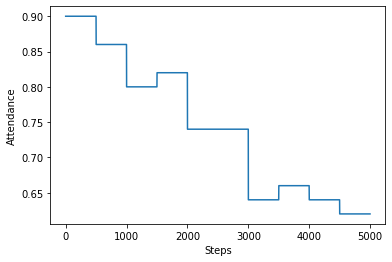

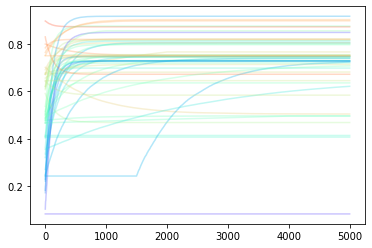

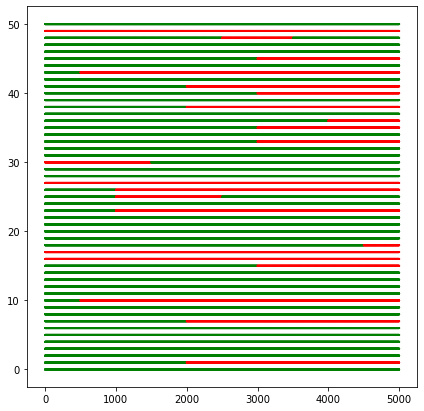

In [8]:
max_steps = 5000
lecture_duration = 500

initial_emotion_mu = 0.5
initial_emotion_sigma = 0.2

model = AttendanceModel(num_agents=num_agents, adjacencyMatrix=adjacencyMatrix, seed=seed, expressiveness_teacher=expressiveness_teacher, initial_emotion_teacher=initial_emotion_teacher, updateAdj=updateAdj, my_lambda=my_lambda, teacher_send_alpha_sigma=teacher_send_alpha_sigma,friendship_increase=friendship_increase, initial_emotion_mu=initial_emotion_mu, divided_group=divided_into_groups, group_num=group_num, alpha_t_lowerbound=alpha_t_lowerbound, initial_emotion_sigma=initial_emotion_sigma, max_steps=max_steps, lecture_duration=lecture_duration, dt=dt)
model.run_model()
       
visualize(model, num_agents)



#### Increase number of interactions per step:
* $\mu$=0.5 and $\sigma$=0.2 
* steps 500
* interactions 10 $\times$ number of agents 


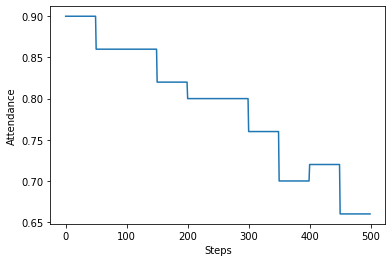

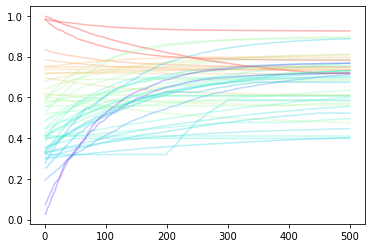

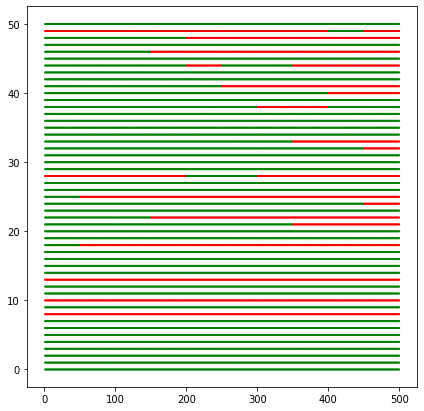

In [14]:
#I added another argument "interaction_multiplier" in the model

max_steps = 500
lecture_duration = 50

initial_emotion_mu = 0.5
initial_emotion_sigma = 0.2
interactions_multiplier = 10

model = AttendanceModel(num_agents=num_agents, adjacencyMatrix=adjacencyMatrix, seed=seed, expressiveness_teacher=expressiveness_teacher, initial_emotion_teacher=initial_emotion_teacher, updateAdj=updateAdj, my_lambda=my_lambda, teacher_send_alpha_sigma=teacher_send_alpha_sigma,friendship_increase=friendship_increase, initial_emotion_mu=initial_emotion_mu, divided_group=divided_into_groups, group_num=group_num, alpha_t_lowerbound=alpha_t_lowerbound, initial_emotion_sigma=initial_emotion_sigma, max_steps=max_steps, lecture_duration=lecture_duration, dt=dt, interactions_multiplier=interactions_multiplier)
model.run_model()
       
visualize(model, num_agents)



#### Decrease number of interactions per step:
* $\mu$=0.5 and $\sigma$=0.2 
* steps 500
* interactions 0.5 $\times$ number of agents 

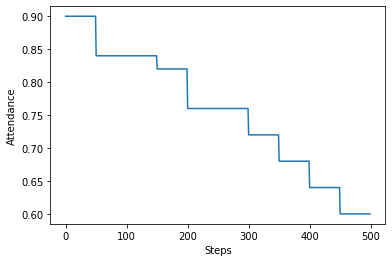

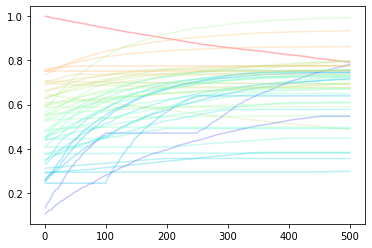

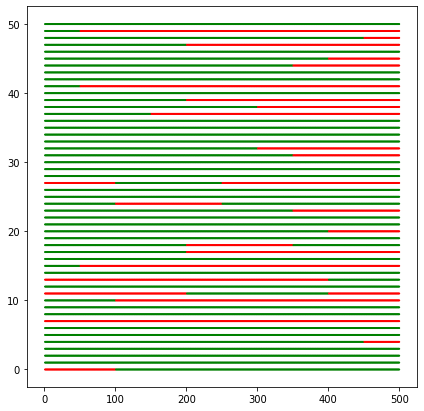

In [17]:
max_steps = 500
lecture_duration = 50

initial_emotion_mu = 0.5
initial_emotion_sigma = 0.2
interactions_multiplier = 0.5

model = AttendanceModel(num_agents=num_agents, adjacencyMatrix=adjacencyMatrix, seed=seed, expressiveness_teacher=expressiveness_teacher, initial_emotion_teacher=initial_emotion_teacher, updateAdj=updateAdj, my_lambda=my_lambda, teacher_send_alpha_sigma=teacher_send_alpha_sigma,friendship_increase=friendship_increase, initial_emotion_mu=initial_emotion_mu, divided_group=divided_into_groups, group_num=group_num, alpha_t_lowerbound=alpha_t_lowerbound, initial_emotion_sigma=initial_emotion_sigma, max_steps=max_steps, lecture_duration=lecture_duration, dt=dt, interactions_multiplier=interactions_multiplier)
model.run_model()
       
visualize(model, num_agents)


### Final comment: 

* For the choice of mu and sigma I don't see too many differences between the charts. Big sigma means an overpopulation of 1s and 0s. In light of the results I think that mu = 0.5 and sigma =0.2 is a good choice because covers almost all the range of values without overpopulation of 0s and 1s. 

* Higher number of steps shows a stationary value for the agents' emotions but not for the attendance rate. The latter is reasonable: if the emotions reach a stationary values and it is easier to drop the class than recover it, it means that the attendance rate will go downwards (?). The former is still not clear to me. Probably due to the fact that after a while the teacher interaction saturates. But I was expecting a behavior such as the one showed in fig. 4 of the paper 

* Increasing the number of interactions leads to reaching the "stationary" beahavior with less steps. On the other hand the time needed to run the simulation increases a lot. 
